In [1]:
import os
from PIL import Image
from utils import *
import torch
from diffusers import StableDiffusionPipeline

device = "cuda:4"

### Load Stable Diffusion

In [2]:
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    torch_dtype=torch.float16
)
print("[INFO] Successfully loaded Stable Diffusion!")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


[INFO] Successfully loaded Stable Diffusion!


### Load LoRA weights

In [ ]:
# lora_path = "./runs/sd-onepiece-model-lora"
# lora_path = "./runs/artistic_custom"
lora_path = "./runs/dreambooth_cat"
# lora_path = None  # if not using LoRA

if lora_path is not None:
    pipe.load_lora_weights(lora_path)
    print("[INFO] Successfully loaded LoRA weights!")
    
pipe = pipe.to(device)

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


[INFO] Successfully loaded LoRA weights!


### Inference

  0%|          | 0/30 [00:00<?, ?it/s]

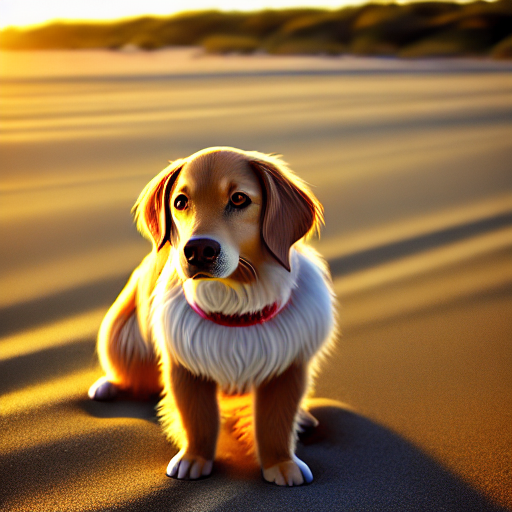

In [8]:
prompt = "a dog roaming in the beach"

seed = 13

seed_everything(seed)

image = pipe(
    prompt, 
    num_inference_steps=30, 
    guidance_scale=7.5
).images[0]

image